1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. 

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [4]:
5+3

8

COMENTARIOS:

1)

## Ejercicio 1

(5 puntos) Estudiamos en primer lugar un modelo llamado "perros y pulgas", o también de las "urnas de Ehrenfest".  Suponemos dos perros $A$ y $B$ tales que en el instante $t=0$ $A$ tiene $n$ pulgas (numeradas de $0$ a $n-1$) y $B$ ninguna.  Los perros están durmiendo uno al lado del otro y las pulgas pueden saltar de uno a otro sin problema. La regla de evolución del sistema es la siguiente: Si en el instante $t$, $L_A(t)$  y $L_B(t)$ son las listas de pulgas en $A$ y $B$, elegimos un entero aleatorio en el intervalo cerrado  $[0,n-1]$ y la pulga que lleva ese número salta cambiando de perro. Así obtenemos las nuevas listas $L_A(t+1)$  y $L_B(t+1)$ que determinan el estado del sistema en el instante $t+1$ (el tiempo es, como en otros ejemplos que hemos considerado,  discreto $t=0,1,2,3,\dots$).  

A) En primer lugar programa una función $siguiente(n,L_A,L_B)$ que reciba el estado del sistema en un instante  y devuelva el estado en el siguiente. 

B) Realiza un gráfico que represente, comenzando con $1000$ pulgas en $A$,  la evolución temporal del número de pulgas en $B$.  Debe observarse claramente la estabilización del número de pulgas, y, a partir de ese momento, oscilaciones pequeñas.

C) Cambia la función del apartado $A$ por otra,  $siguiente1(n,n_B)$,  que únicamente tenga en cuenta el número de pulgas en el perro $B$ ($n_A+n_B=n$ en todo momento). A fin de cuentas, ¿qué nos importa cómo se llama la pulga que ha saltado al pasar del instante $t$ al $t+1$? Nos debe bastar con saber cuántas pulgas hay en cada perro, y el comportamiento del sistema debe ser el mismo que con  la versión en el apartado A).  Repite el gráfico del apartado B) y comprueba que se obtiene, esencialmente, el mismo.

D) Estudia ahora la siguiente variante del modelo: para pasar del estado $t$ al $t+1$:

1) Elegimos aleatoriamente uno de los dos perros. 

2) Cada perro tiene una probabilidad,  $p_A$ o $p_B$ que no cambia, de que una pulga salte al otro.

3) Cuando un perro ha sido elegido en el sorteo realizado en 1) y tiene pulgas, una pulga salta al otro perro con probabilidad  $p_A$, si se trata del perro $A$, o $p_B$ si el elegido es $B$.

¿Se estabiliza el número de pulgas en cada perro? A largo plazo, ¿qué se obtiene para el número de pulgas en $B$? La respuesta dependerá de los valores de $p_A$ y $p_B$ utilizados, y para responder se pueden realizar gráficos con diferentes valores de las probablidades.


In [44]:
def getPos(L, value):
    for i in srange(len(L)):
        if(value == L[i]):
            return i
    return -1

In [52]:
def remove(L, pos):
    R = []
    for i in srange(len(L)):
        if i != pos:
            R.append(L[i])
    return R

In [87]:
def siguiente(n , LA, LB):
    num = floor(random()*n)
    if num in LA:
        pulga = LA[getPos(LA, num)]
        LA = remove(LA, getPos(LA, num))
        LB.append(pulga)
    else:
        if num in  LB:
            pulga = LB[getPos(LB, num)]
            LB = remove(LB, getPos(LB, num))
            LA.append(pulga)
        
    return (n, LA, LB)

In [88]:
L = srange(7)
R = []
print siguiente(7, L, R)

(7, [0, 1, 2, 3, 4, 6], [5])


In [89]:
def obtenerGraf(n, numIter):
    
    LA = srange(n)
    LB = []
    Result = []
    for i in srange(numIter):
        (n, LA, LB) = siguiente(n, LA, LB)
        Result.append((i, len(LB)))
    return Result

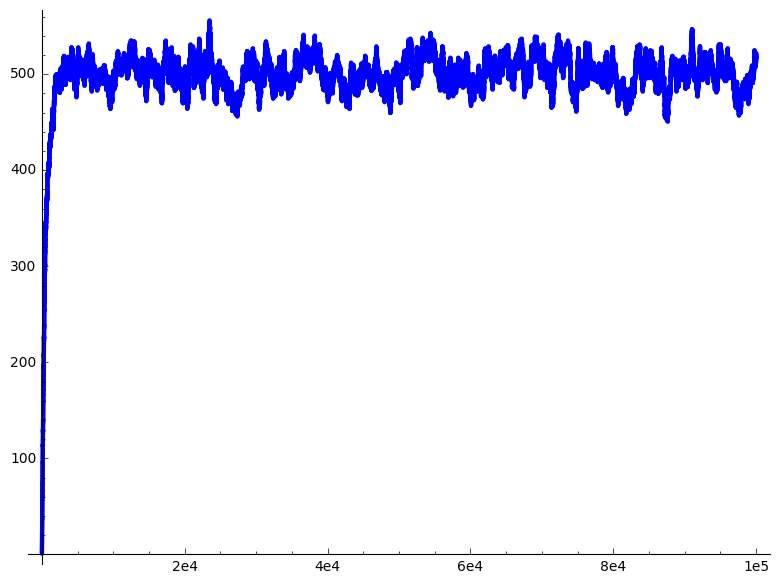

CPU times: user 19.2 s, sys: 64 ms, total: 19.2 s
Wall time: 19.1 s


In [100]:
%%time
Graf = obtenerGraf(1000, 100000)
points(Graf).show()

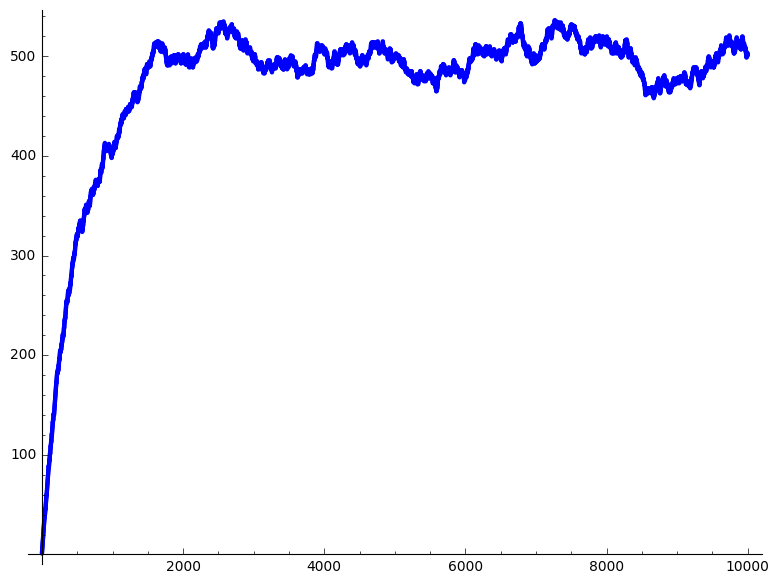

CPU times: user 2.55 s, sys: 32 ms, total: 2.58 s
Wall time: 2.56 s


In [101]:
%%time
Graf = obtenerGraf(1000, 10000)
points(Graf).show()

Como se puede ver, la función tiene exactamente el comportamiento esperado, manteniendose estable en aproximadamente n/2

In [102]:
def siguiente1(n, LB):
    num = floor(random()*n)
    if num in LB:
        LB = remove(LB, getPos(LB, num))
    else:
        LB.append(num)
        
    return (n, LB)

In [103]:
def obtenerGraf1(n, numIter):
    LB = []
    Result = []
    for i in srange(numIter):
        (n, LB) = siguiente1(n, LB)
        Result.append((i, len(LB)))
    return Result

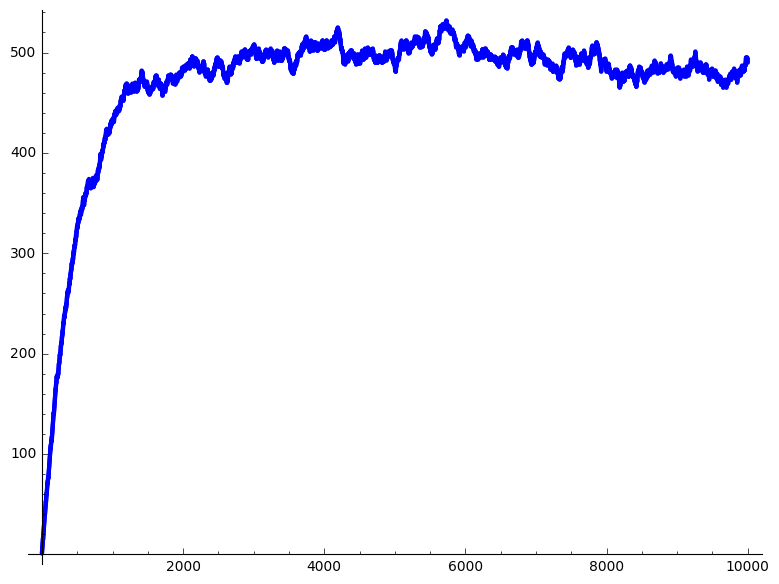

CPU times: user 1.14 s, sys: 20 ms, total: 1.16 s
Wall time: 1.12 s


In [107]:
%%time
Graf = obtenerGraf1(1000, 10000)
points(Graf).show()

Como podemos ver, el gráfica con la nueva función es exactamente igual

Para el apartado D solo usaremos el número de pulgas en cada perro, y no la lista de pulgas que hay en cada. Esto permite simplificar el análisis y evitar bucles de listas, siendo ,ás eficiente

In [105]:
def nuevoModeloSiguiente(n, numA, numB, pA, pB):
    num = random()
    
    if num <= 0.5:
        #Salta el perro A
        if(numA > 0):
            num = random()
            if num<= pA:
                #Salta
                numA -= 1
                numB += 1
    else:
        #Salta el perro B
        if(numB > 0):
            num = random()
            if num <= pB:
                #Salta
                numA += 1
                numB -= 1
    
    return (n, numA, numB, pA, pB)
    
    

In [106]:
def obtenerGrafNuevo(n, numIter, pA, pB):
    numA = n
    numB = 0
    Result = []
    for i in srange(numIter):
        (n, numA, numB, pA, pB) = nuevoModeloSiguiente(n, numA, numB, pA, pB)
        Result.append((i, numB))
    return Result

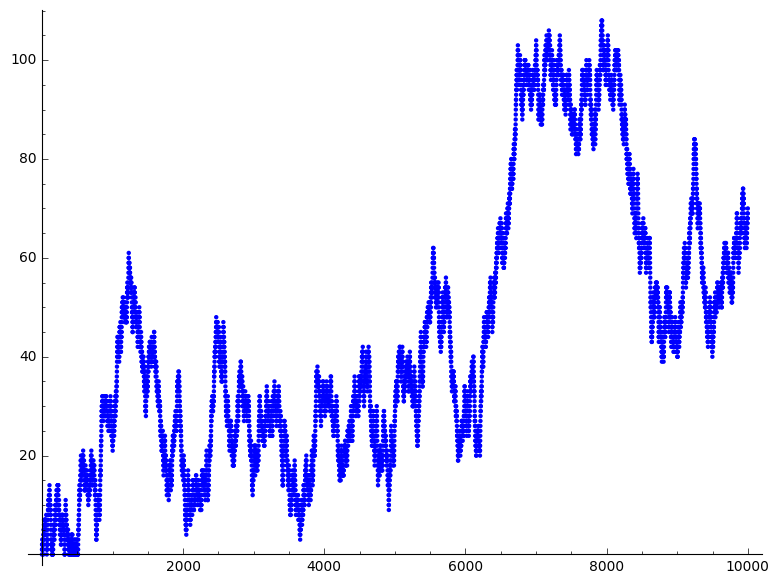

CPU times: user 440 ms, sys: 8 ms, total: 448 ms
Wall time: 466 ms


In [111]:
%%time
## Experimento 1: Siempre salta una pulga si tiene
Graf = obtenerGrafNuevo(1000, 10000, 1, 1)
points(Graf).show()

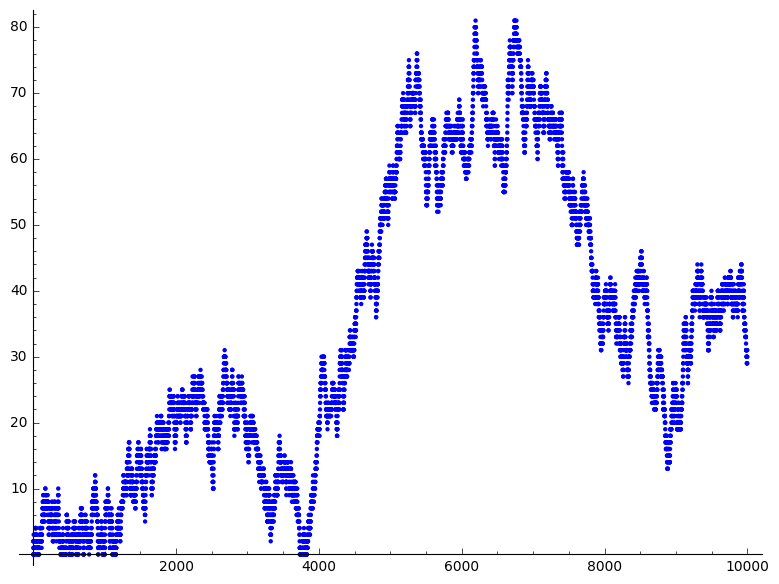

CPU times: user 512 ms, sys: 0 ns, total: 512 ms
Wall time: 529 ms


In [112]:
%%time
## Experimento 2: Salta la pulga la mitad de las veces en ambos
Graf = obtenerGrafNuevo(1000, 10000, 0.5, 0.5)
points(Graf).show()

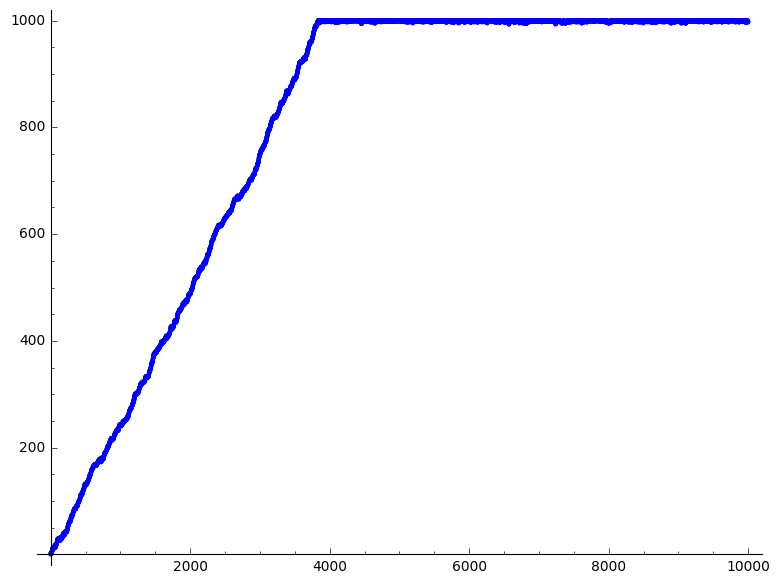

CPU times: user 416 ms, sys: 4 ms, total: 420 ms
Wall time: 443 ms


In [113]:
%%time
## Experimento 2: pA > pB
Graf = obtenerGrafNuevo(1000, 10000, 1, 0.5)
points(Graf).show()

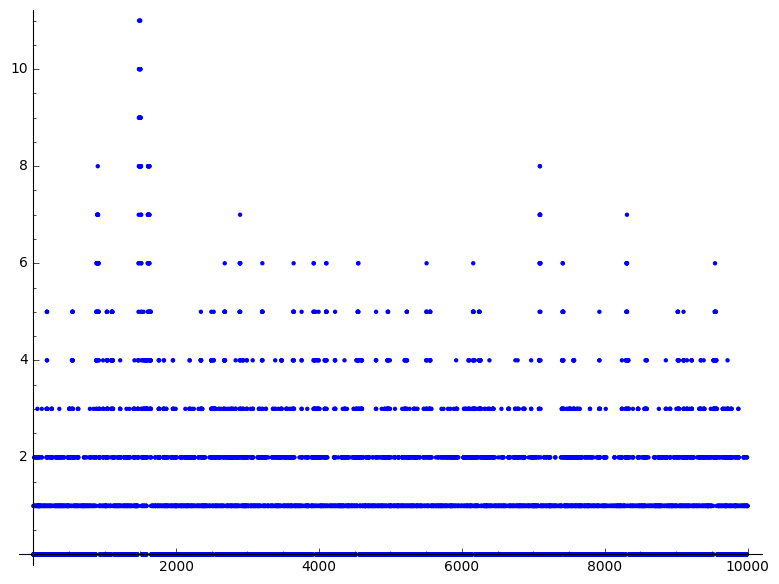

CPU times: user 460 ms, sys: 0 ns, total: 460 ms
Wall time: 479 ms


In [114]:
%%time
## Experimento 4: pA < pB
Graf = obtenerGrafNuevo(1000, 10000, 0.5, 1)
points(Graf).show()

Procedo a explicar los cuatro experimentos que he realizado y las conclusiones que he sacado de ellos:

   EXPERIMENTO 1: 
   En el experimento uno he causado pA=pB=1, es decir, sea cual sea el perro que salte, si tiene pulgas siempre pierde una. El resultado como se puede ver es un patrón irregular, asciende y desciende. Aun no podemos sacar conclusiones, pero parece incitante probar pA=pB con otro valor
   
   EXPERIMENTO 2:
   En el experimento 2 he probado pA=pB=0.5. Ahora solo salta la mitad de las veces, por lo que tal vez cabría esperar una gráfica distinta. Sin embargo, no solo aun es irregular, sino que el patrón es similar. Parece lógico pensar pues que con una probabilidad equivalente de saltar en cada perro, y saltar cada pulga, salvo pequeñas (mas o menos) irregularidades ocuree que "las pulgas que entran por las que salen", como diría Dirichlet. Cabe esperar por tanto que la tendencia a estabilizarse ocurra cuando pA > pB o viceversa.
   
   EXPERIMENTO 3:
   Probamos pA = 2pB. Ahora es más probable que B reciba pulgas que que las ceda, por tanto cabe esperar que el número de pulgas en B se estabilice a n, y el de A a 0. El resultado de la gráfica se corresponde con esto, e incluso la tendencia con la que se llega a ese punto estable (pendiente de la subida) es constante y vale 2, lo que parece indicar que la función pA = f(pB) se relaciona con la velocidad que se alcanza la estabilidad.
   
   EXPERIMENTO 4:
   Probamos ahora pB = 2pA, y pB = 1. El resultado es menos claramento funcional, posiblemente debido a que uno de los perros siempre salta, pero aun así se obtiene el resultado esperado de que el perro B se mantiene vacío pues es más probable que dé pulgas que que reciba
   
   CONCLUSIÓN:
   En conclusión, mi teoría basándome en esta terna de experimentos es que si pA > pB, numB se estabiliza siempre a n, si pB > pA, numB se estabiliza a 0; y si pA~pB, numB se mantiene en su valor inicial con ciertas fluctuaciones que aumentan o disminuyen según el valor de p (en nuestro caso se mantiene próximo a 0 pues es el valor inicial).

## Ejercicio 2

(5 puntos)  Supongamos una baraja de cartas inicialmente ordenada. Conocemos, con absoluta certeza, dónde está cada carta de la baraja. Cuando empezamos a barajar la incertidumbre va aumentando, y queremos estudiar este proceso de "aumento de incertidumbre".  Representamos el estado inicial de la baraja de $n$ cartas mediante la lista $srange(n)$, y cualquier estado mediante una reordenación de esta lista.

A) Define una función $barajar(L)$ que reciba una lista, que representa un estado de la baraja, y devuelva la lista $L$ barajada una única vez de acuerdo al siguiente algoritmo:
    
    1) Producimos, aleatoriamente con igual probabilidad de cero o uno,  una lista $LA$  de ceros y unos de longitud $n$. Sea $k$ el número de ceros que hemos obtenido.
    
    2) Llamemos $L1$ a la sublista de $L$ formada por los primeros $k$ elementos de $L$ y $L2$ al resto de $L$.
    
    3) Sea $L3$, inicialmente una lista vacía, la lista en la que vamos a guardar la reordenación de la lista $L$. Recorremos la lista $LA$ y cada vez que encontramos un cero pasamos el primer elemento de la lista $L1$ a $L3$, y cada vez que encontramos un $1$ pasamos el primer elemento de $L2$ a $L3$.
    
    4) Al terminar devolvemos $L3$. Se llama a esta forma de barajar *riffle shuffle*.

B) ¿Qué es un estado del sistema en este caso? Podríamos decir que es una permutación de la lista $srange(n)$, pero en nuestra situación de incertidumbre acerca de la ordenación obtenida después de barajar es mejor decir que *un estado del sistema es una distribución de probabilidad sobre el conjunto de las $n!$ reordenaciones de la lista*, y, más concretamente, *una lista de $n!$ reales positivos $p_i$ tales que su suma total es $1$*. 

En el estado inicial de la baraja podemos suponer que el estado es $[1,0,0,\dots,0,0]$, y cualquier estado sobre el que no hay incertidumbre tendría un $1$ en algún lugar y el resto serían ceros. En cambio, si barajamos, una o varias veces, y no miramos la ordenación obtenida el estado es una distribución de probabilidad que nos dice cómo de probable es cada reordenación.
 
 C) ¿Cómo se mide la cantidad de información? Claude Shannon, creador en 1948 de la teoría de la información, llegó a una solución que ya era conocida en física con el nombre de *entropía*. Concretamente, si $L$ es una lista que representa una distribución de probablidad sobre $N$ objetos, definió su cantidad promedio de información en bits $I(L)$ en la forma
 $$I(L)=-\sum_{p_i\in L}p_ilog_2(p_i),$$
 de forma que un estado seguro (sin incertidumbre alguna)  tiene una cantidad de información nula.
 
 D) Como $n!$ crece bestialmente con $n$, no es posible realizar el experimento que propongo con una baraja real de $52$ cartas. Tomamos entonces $n=7$, y se trata de averiguar, mediante un experimento adecuadamente planeado,    cuántas veces debemos barajar hasta que  el contenido de información del estado  resultante (la incertidumbre) es  máximo. En ese momento podremos decir que *``la baraja ha sido bien barajada''*.
 


In [1]:
def cartas(n):
    return srange(n)


In [5]:
C = cartas(52)
print C
print C[:5]
print C[5:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [31]:
def barajar(L):
    LA = []
    numCeros = 0
    for item in L:
        num = random()
        if(num <= 0.5):
            LA.append(0)
            numCeros += 1
        else:
            LA.append(1)
            
    L1 = L[:numCeros]
    L2 = L[numCeros:]
    L3 = []
    
    for item in LA:
        if(item == 0):
            L3.append(L1[0])
            L1 = L1[1:]
        else:
            L3.append(L2[0])
            L2 = L2[1:]
        
    return L3

In [127]:
SC = barajar(C)
print SC

[23, 24, 25, 26, 0, 1, 2, 3, 27, 28, 29, 4, 5, 6, 7, 30, 31, 8, 9, 10, 32, 11, 12, 33, 34, 13, 35, 14, 36, 37, 38, 39, 40, 41, 42, 43, 15, 44, 16, 45, 46, 17, 47, 48, 18, 19, 49, 20, 50, 51, 21, 22]


In [152]:
def getPosList(L1, L2):
    for j in srange(len(L1)):
        equal = true
        for i in srange(len(L1[j])):
            if L1[j][i]!=L2[i]:
                equal = false
                break
        if equal == true:
            return j
    return -1

In [189]:
def Shannon(L): ##devuelve la cantidad de informacion
    result = 0
    for item in L:
        if(item == 0):
            continue
        result += (item)*log(item, 2).n(digits = 8)
    return -result

In [193]:
def obtenerProbabilidades(L, numIter):
    Perms = Permutations(L).list()
    Result = []
    ProbShuffle= [0]*len(Perms)
    
    pos = getPosList(Perms, L)
    ProbShuffle[pos] = 1
    
    Result.append((0, Shannon(ProbShuffle)))
    
    for i in range(1, numIter+1): #Numero de veces que barajo
        R = L
        ProbShuffle= [0]*len(Perms)
            
        for j in srange(numIter*10):#Numeros de veces que repito la baraja para obtener probabilidades
            R = barajar(L) #Barajo por iesima vez
            pos = getPosList(Perms, R) #Obtengo a que permutacion he llegado
            ProbShuffle[pos] += 1 #Sumo a la probabilidad de que llegue a esa permutacion en esta iteracion
        
        for k in srange(len(ProbShuffle)):
            ProbShuffle[k] = ProbShuffle[k]/numIter
            
        L = barajar(L)
        Result.append((i, Shannon(ProbShuffle)))
    return Result

In [191]:
%%time
L = srange(7)
Probs = obtenerProbabilidades(L, 10) ##Barajando 10 veces, 100 barajeos por vez

CPU times: user 31.6 s, sys: 180 ms, total: 31.8 s
Wall time: 31.4 s


[(0, -0.00000000), (1, 25.517326), (2, 25.103429), (3, 23.815371), (4, 25.676689)]


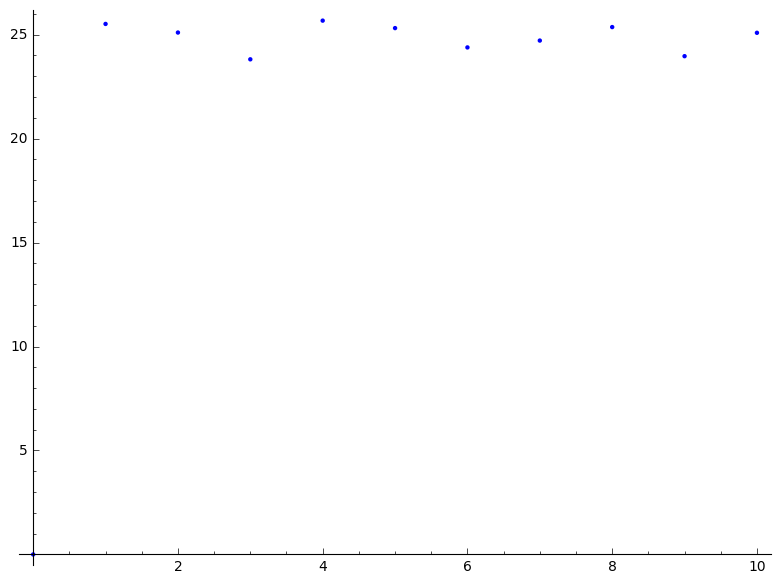

In [192]:
print Probs[:5]

points(Probs) ##Dibuja la lista anterior, el maximo es el numero de barajeos que buscamos

La función superior no parece muy descriptiva. Según ella, el máximo se alcanza al barajar una vez, lo que indica que el RiffleShuffle baraja de forma aleatoria en solo una vez

Esta funcion de abajo si no diera un error extraño por un fallo de sintaxis, podría aproximar mejor. Al menos espero que la nueva idea se vea

In [202]:
def obtenerProbabilidades2(L, numBarajar, numIter):
    Perms = Permutations(L).list()
    Result = []
    Probs = []
    ProbShuffle= [0]*len(Perms)
    pos = getPosList(Perms, L)
    ProbShuffle[pos] = 1
    Probs.append(ProbShuffle)
    result.append((0, 0)
    
    for i in range(1, numIter+1):#Numero de veces que repito
            ProbShuffle= [0]*len(Perms)
            Probs.append(ProbShuffle)
    
    
    for i in range(1, numIter+1): 
        #Numero de veces que repito
        R = L
        for j in range(1, numBarajar+1): #Numero de veces que barajo
            R = barajar(R)
            pos = getPosList(Perms, R) #Obtengo a que permutacion he llegado
            Probs[j][pos] += 1 #Sumo a la probabilidad de que llegue a esa permutacion en esta iteracion
    
    for i in range(1, numIter+1):
        for j in srange(len(ProbShuffle)):
            Probs[i][j] = Probs[i][j]/numIter
        Result.append((i, Shannon(Probs[i])))
            
    return Result

SyntaxError: invalid syntax (<ipython-input-202-09081e062247>, line 11)

In [203]:
%%time
L = srange(7)
Probs = obtenerProbabilidades2(L, 5, 1000) ##Barajando 5 veces, 1000 barajeos por vez

AttributeError: 'list' object has no attribute 'add'